# Word2Vec Intro

In [1]:
from typing import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

## Animal similarities

In [2]:
data = {
    'kitten': [95, 15],
    'hamster': [80, 8],
    'tarantula': [8, 3],
    'puppy': [90, 20],
    'crocodile': [5, 40],
    'dolphin': [60, 45],
    'panda_bear': [75, 40],
    'lobster': [2, 15],
    'capybara': [70, 30],
    'elephant': [65, 90],
    'mosquito': [1, 1],
    'goldfish': [25, 2],
    'horse': [50, 50],
    'chicken': [25, 15]
}

In [3]:
df = pd.DataFrame.from_dict(data, orient='index', columns=['cuteness', 'size'])
df.head()

,cuteness,size
kitten,95,15
hamster,80,8
tarantula,8,3
puppy,90,20
crocodile,5,40


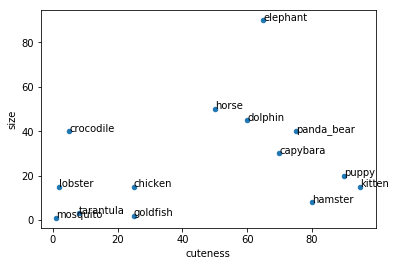

In [4]:
fig, ax = plt.subplots()
df.plot(x='cuteness', y='size', kind='scatter', ax=ax)

for k, v in df.iterrows():
    ax.annotate(k, v)

fig.canvas.draw()

Calculating the distance via the euclidean distance.

$$d(x, y) = d(y, x) = \sqrt{\sum_{i=1}^N (x_i - y_i)^2}$$

In [5]:
def euclidean_dist(x: Tuple, y: Tuple) -> int:
    x1, x2 = x
    y1, y2 = y
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [6]:
# panda <--> capybara
panda_bear = df.loc['panda_bear']
capybara = df.loc['capybara']

x = (panda_bear['cuteness'], capybara['cuteness'])
y = (panda_bear['size'], capybara['size'])

euclidean_dist(x, y)

11.180339887498949

In [7]:
# tarantula <--> elephant
tarantula = df.loc['tarantula']
elephant = df.loc['elephant']

x = (tarantula['cuteness'], elephant['cuteness'])
y = (tarantula['size'], elephant['size'])

euclidean_dist(x, y)

104.0096149401583

## Color words and their similarities

In [8]:
!wget https://raw.githubusercontent.com/dariusk/corpora/master/data/colors/xkcd.json -O xkcd.json

--2019-04-17 08:37:01--  https://raw.githubusercontent.com/dariusk/corpora/master/data/colors/xkcd.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.12.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.12.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82049 (80K) [text/plain]
Saving to: 'xkcd.json'

xkcd.json           100%[===================>]  80.13K  --.-KB/s    in 0.06s   

2019-04-17 08:37:02 (1.41 MB/s) - 'xkcd.json' saved [82049/82049]



In [9]:
color_data = json.loads(open('xkcd.json').read())
color_data

{'description': 'The 954 most common RGB monitor colors, as defined by several hundred thousand participants in the xkcd color name survey.',
 'colors': [{'color': 'cloudy blue', 'hex': '#acc2d9'},
  {'color': 'dark pastel green', 'hex': '#56ae57'},
  {'color': 'dust', 'hex': '#b2996e'},
  {'color': 'electric lime', 'hex': '#a8ff04'},
  {'color': 'fresh green', 'hex': '#69d84f'},
  {'color': 'light eggplant', 'hex': '#894585'},
  {'color': 'nasty green', 'hex': '#70b23f'},
  {'color': 'really light blue', 'hex': '#d4ffff'},
  {'color': 'tea', 'hex': '#65ab7c'},
  {'color': 'warm purple', 'hex': '#952e8f'},
  {'color': 'yellowish tan', 'hex': '#fcfc81'},
  {'color': 'cement', 'hex': '#a5a391'},
  {'color': 'dark grass green', 'hex': '#388004'},
  {'color': 'dusty teal', 'hex': '#4c9085'},
  {'color': 'grey teal', 'hex': '#5e9b8a'},
  {'color': 'macaroni and cheese', 'hex': '#efb435'},
  {'color': 'pinkish tan', 'hex': '#d99b82'},
  {'color': 'spruce', 'hex': '#0a5f38'},
  {'color': 'str

In [10]:
def hex_to_tuple(hexcode: str) -> Tuple:
    h = hexcode.lstrip('#')
    rgb_tuple = int(h[:2], 16), int(h[2:4], 16), int(h[4:6], 16)
    return rgb_tuple

In [11]:
colors = dict()

for item in color_data['colors']:
    colors[item['color']] = hex_to_tuple(item['hex'])

In [12]:
colors['olive']

(110, 117, 14)

In [13]:
df = pd.DataFrame.from_dict(colors, orient='index', columns=['r', 'g', 'b'])
df.head()

,r,g,b
cloudy blue,172,194,217
dark pastel green,86,174,87
dust,178,153,110
electric lime,168,255,4
fresh green,105,216,79


In [14]:
def closest(space: pd.DataFrame, coord: Tuple, n=10) -> pd.DataFrame:
    new_space = space.copy()
    res = np.linalg.norm(space[['r', 'g', 'b']].sub(np.array(coord)), axis=1)
    new_space['distance'] = res
    return new_space.sort_values('distance').head(10)

In [15]:
closest(df, colors['red'])

,r,g,b,distance
red,229,0,0,0.000000
fire engine red,254,0,2,25.079872
bright red,255,0,13,29.068884
tomato red,236,45,1,45.552168
cherry red,247,2,42,45.738387
scarlet,190,1,25,46.335731
vermillion,244,50,12,53.563047
orangish red,244,54,5,56.267220
cherry,207,2,52,56.497788
lipstick red,192,2,47,59.849812


In [16]:
closest(df, [150, 60, 150])

,r,g,b,distance
warm purple,149,46,143,15.684387
medium purple,158,67,162,16.031220
ugly purple,164,66,160,18.220867
light eggplant,137,69,133,23.216374
purpleish,152,86,141,27.586228
purplish,148,86,140,27.928480
purply,152,63,178,28.231188
light plum,157,87,131,33.749074
purple,126,30,156,38.884444
muted purple,128,91,135,40.865633


In [17]:
blueish = df.loc['purple'] - df.loc['red']

closest(df, blueish)

,r,g,b,distance
cobalt blue,3,10,167,108.429701
royal blue,5,4,170,111.964280
darkish blue,1,65,130,112.769677
true blue,1,15,204,115.520561
royal,12,23,147,115.563835
prussian blue,0,69,119,116.185197
dark royal blue,2,6,111,116.730459
deep blue,4,2,115,117.957620
marine blue,1,56,106,118.287785
deep sea blue,1,84,130,120.033329


In [18]:
cyanish = df.loc['blue'] + df.loc['green']

closest(df, cyanish)

,r,g,b,distance
bright turquoise,15,254,249,14.212670
bright light blue,38,247,253,15.099669
bright aqua,11,249,234,20.736441
cyan,0,255,255,27.495454
neon blue,4,217,255,33.346664
aqua blue,2,216,233,38.327536
bright cyan,65,253,254,42.497059
bright sky blue,2,204,254,45.055521
aqua,19,234,201,49.091751
bright teal,1,249,198,56.267220


In [19]:
# pink is to red as X is to blue
pink_to_red = df.loc['pink'] - df.loc['red']
X = pink_to_red + df.loc['blue']

closest(df, X)

,r,g,b,distance
neon blue,4,217,255,163.297275
bright sky blue,2,204,254,163.444180
bright light blue,38,247,253,170.076453
cyan,0,255,255,172.979768
bright cyan,65,253,254,174.545123
bright turquoise,15,254,249,176.397279
clear blue,36,122,253,178.238604
azure,6,154,243,178.541312
dodger blue,62,130,252,178.924565
lightish blue,61,122,253,180.953033


## Additional resources

- [Jay Alammar - The Illustrated Word2Vec](https://jalammar.github.io/illustrated-word2vec/)
- [Allison Parrish - Understanding word vectors](https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469)